 #  Introduction
 
 
In this kernal I will conduct a regular season analysis on NCAA tournament for seasons 2012 - 2019. I will ask series of question of the data, with the aim of better understanding the dataset provided.
The results and answers to these questions will be displayed using packages provided by python. The questions will be :

1. Does a team score more points when playing at home, than when playing at either a neutral ground or an away ground?

2. Is there a difference between how many matches played at home, away or a neutral location?

3. As the season progresses how does the points scored (average) change? and how does it change from season to season?

4. Does a team score more points when playing at home, away or a neutral location?

5. Does a team score more three pointers when playing at home, away or a neutral location?

6. Does a team have more turnovers when playing at home, away or a neutral location?

7. Ranking the top 15 teams in a season by the number of points scored in a season


In [719]:
#Packages imported to be used for analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython import display
from ipywidgets import interact, widgets



In [ ]:
capstone.WScore.describe()

## Question 1
1. Does a team score more points when playing at home than when playing at either a neutral ground or an away ground?

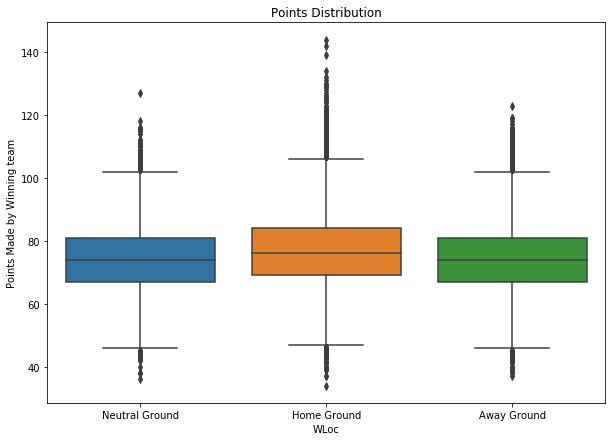

In [482]:
capstone= pd.read_csv("mens-machine-learning-competition-2019/Prelim2019_RegularSeasonDetailedResults.csv")
cap = pd.read_csv("mens-machine-learning-competition-2019/TeamSpellings.csv",encoding ="latin")
fig,ax1 = plt.subplots(1,1)
fig.set_size_inches(10,7)

capstone_plot= sns.boxplot(data = capstone, x= 'WLoc',y ='WScore')

ax1.set_title("Points Distribution")
ax1.set_xticklabels(['Neutral Ground',"Home Ground","Away Ground" ])
ax1.set_ylabel('Points Made by Winning team')
plt.show()

## Conclusion
Teams win more matches at home, than when they are away or at a neutral location. They also score more points at home than away or at a neutral location. The neutral and away ground results are quite similar

## Question 2

2.Is a difference between how many matches were played either home, away or a neutral location?

In [ ]:
pd.DataFrame(capstone.WLoc.value_counts(normalize=True))

In [355]:
groupHome= capstone.groupby("Season").WLoc.value_counts(normalize=True)

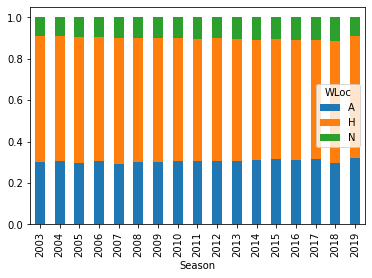

In [357]:
groupHome.unstack().plot(kind='bar',stacked=True)


## Conclusion
It can be concluded that the number of matches played were in the following order home>away >neutral location in all seasons

## Question 3
3. As the season progresses how does the points scored (average) change? and how does it change from season to season?

In [720]:
# The first thing to do is to associate TeamID to the name of the team. This will help us put a name to the team
dic = {}
for i in range(0,len(cap["TeamID"])):
    dic[cap["TeamID"][i]]=cap['TeamNameSpelling'][i]
capstone["WTeamName"]=[dic[teamid] for teamid in capstone['WTeamID']]
capstone["LTeamName"]=[dic[teamid] for teamid in capstone['LTeamID']]

In [721]:
capstone.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,TeamName,WTeamName,LTeamName
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,22,8,18,9,2,20,alabama,alabama,oklahoma
1,2003,10,1272,70,1393,63,N,0,26,62,...,20,25,7,12,8,6,16,memphis,memphis,syracuse
2,2003,11,1266,73,1437,61,N,0,24,58,...,31,22,9,12,2,5,23,marquette,marquette,villanova
3,2003,11,1296,56,1457,50,N,0,18,38,...,17,20,9,19,4,3,23,northern-illinois,northern-illinois,winthrop
4,2003,11,1400,77,1208,71,N,0,30,61,...,21,15,12,10,7,1,14,texas,texas,georgia


In [ ]:
AvgPoint=capstone.groupby("DayNum").WScore.mean()

In [759]:
def plotyear(Season):
    Avg=pd.DataFrame(capstone[capstone.Season == Season].groupby("DayNum").WScore.mean().reset_index())
    Avg.plot.scatter('DayNum','WScore',
                      
                      linewidths=1,edgecolors='k',
                      figsize=(12,9))
    
    plt.axis(ymin=50,ymax=100,xmin=0,xmax=150)
    plt.xlabel('Progression of Season')
    plt.ylabel('Points Scored')

In [760]:
pd.DataFrame(capstone[capstone.Season == 2003].groupby("DayNum").WScore.mean()).reset_index()

,DayNum,WScore
0,10,69.000000
1,11,71.750000
2,12,77.500000
3,13,80.500000
4,14,76.181818
...,...,...
115,128,69.928571
116,129,73.066667
117,130,73.000000
118,131,71.842105


In [761]:
interact(plotyear,Season=widgets.IntSlider(min=2003,max=2019,step=1,value=2003))

interactive(children=(IntSlider(value=2003, description='Season', max=2019, min=2003), Output()), _dom_classes…

<function __main__.plotyear(Season)>

## Conclusion

The general trend is that as the season progresses the points scored tends to decrease. This pattern is generally the same across all seasons

## Question 4 

4. Is there a variation in the points scored per season depending whether a team is playing at home, away or a neutral location?

In [602]:
Home = capstone[capstone.WLoc == 'H']
Away = capstone[capstone.WLoc == 'A']
Neutral = capstone[capstone.WLoc == 'N']

In [616]:
AvgH=Home.groupby("Season").WScore.mean()

AvgA=Away.groupby("Season").WScore.mean()

AvgN=Neutral.groupby("Season").WScore.mean()

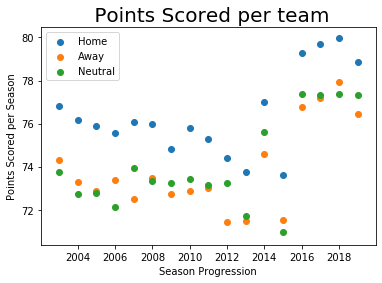

In [768]:
A=plt.scatter(AvgH.index,AvgH)
B=plt.scatter(AvgA.index,AvgA)
C=plt.scatter(AvgN.index,AvgN)


plt.xlabel('Season Progression')
plt.ylabel('Points Scored per Season')
plt.title(' Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()


## Conclusion
The order at which team scores points is Home > Away > Neutral

## Question 5

5. Does a team score more three pointers when playing at home, away or a neutral location?

In [769]:
AvgH3=Home.groupby("Season").WFGM3.mean()

AvgA3=Away.groupby("Season").WFGM3.mean()

AvgN3=Neutral.groupby("Season").WFGM3.mean()

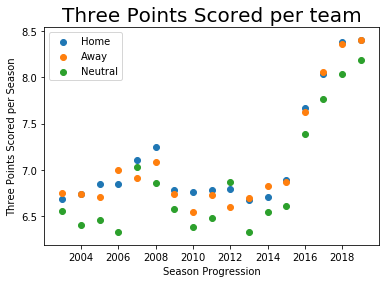

In [783]:
A3=plt.scatter(AvgH3.index,AvgH3)
B3=plt.scatter(AvgA3.index,AvgA3)
C3=plt.scatter(AvgN3.index,AvgN3)


plt.xlabel('Season Progression')
plt.ylabel('Three Points Scored per Season')
plt.title('Three Points Scored per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

## Conclusion

The order at which team scores three pointers is Away > Home > Neutral

## Question 6
6. Does a team commit more turnovers at home than away

In [780]:
AvgHTO=Home.groupby("Season").WTO.mean()

AvgATO=Away.groupby("Season").WTO.mean()

AvgNTO=Neutral.groupby("Season").WTO.mean()

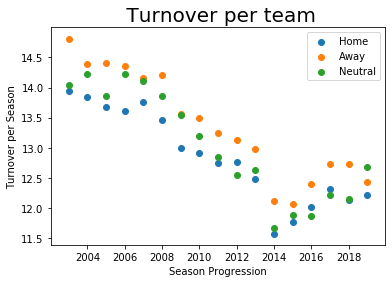

In [781]:
ATO=plt.scatter(AvgHTO.index,AvgHTO)
BTO=plt.scatter(AvgATO.index,AvgATO)
CTO=plt.scatter(AvgNTO.index,AvgNTO)


plt.xlabel('Season Progression')
plt.ylabel('Turnover per Season')
plt.title(' Turnover per team', size=20)
plt.legend(["Home", "Away","Neutral"],loc=0)
plt.show()

##  Conclusion

The order at which team commits turnover is Away> Neutral > Home

## Question 7

7. Ranking the top 15 teams by the  no. of points scored in a season

In [633]:
Teams =capstone["TeamName"].unique()
for year in range(2003,2004):
    points_dict  = {team:0 for team in Teams}
    results = capstone[capstone["Season"]==year]
    results.reset_index()
    for i in range(0,len(results)):
        points_dict[capstone['WTeamName'][i]] += capstone["WScore"][i]
        points_dict[capstone['LTeamName'][i]] += capstone["LScore"][i]
        

In [722]:
points_dict

{'alabama': 1940,
 'memphis': 2161,
 'marquette': 2195,
 'northern-illinois': 2158,
 'texas': 2208,
 'wisconsin': 2051,
 'colorado-state': 2220,
 'eastern-washington': 2029,
 'florida-atlantic': 1865,
 'creighton': 2615,
 'furman': 1807,
 'iupui': 2280,
 'notre-dame': 2483,
 'belmont': 2029,
 'cleveland-state': 1969,
 'eastern-illinois': 2162,
 'unc': 2277,
 'rutgers': 1894,
 'stanford': 2240,
 'ut-arlington': 1691,
 'xavier': 2347,
 'florida': 2353,
 'kansas': 2440,
 'uncg': 1959,
 'nebraska': 1839,
 'arizona-state': 2203,
 'arkansas': 1726,
 'arkansas-state': 1849,
 'auburn': 2103,
 'austin-peay': 1882,
 'ball-state': 2199,
 'bradley': 2097,
 'butler': 1989,
 'byu': 2246,
 'central-michigan': 2301,
 'central-conn-st': 1891,
 'north-carolina-charlotte': 1985,
 'tennessee-chattanooga': 2235,
 'coastal-carolina': 1749,
 'col-of-charleston': 2127,
 'colorado': 2341,
 'cornell': 1558,
 'drake': 1785,
 'east-carolina': 1575,
 'evansville': 1960,
 'fordham': 1810,
 'georgetown': 2213,
 'gon

In [723]:
Ranks={key:rank for rank, key in enumerate (sorted(points_dict,key=points_dict.get),1)}
Ranks

{'utah-valley-state': 1,
 'uc-davis': 2,
 'longwood': 3,
 'northern-colorado': 4,
 'south-dakota-state': 5,
 'kennesaw-state': 6,
 'north-dakota-state': 7,
 'north-florida': 8,
 'njit': 9,
 'central-arkansas': 10,
 'winston-salem-state': 11,
 'florida-gulf-coast': 12,
 'csu-bakersfield': 13,
 'north-carolina-central': 14,
 'presbyterian': 15,
 'usc-upstate': 16,
 'houston-baptist': 17,
 'north-dakota': 18,
 'southern-illinois-edwardsville': 19,
 'bryant university': 20,
 'seattle-u': 21,
 'south-dakota': 22,
 'omaha': 23,
 'northern-ky': 24,
 'grand-canyon': 25,
 'umass-lowell': 26,
 'incarnate-word': 27,
 'abilene-christian': 28,
 'california baptist': 29,
 'north alabama': 30,
 'columbia': 31,
 'army-west-point': 32,
 'portland-state': 33,
 'nicholls-state': 34,
 'morris-brown': 35,
 'uc-riverside': 36,
 'the-citadel': 37,
 'ark-pine-bluff': 38,
 'dartmouth': 39,
 'navy': 40,
 'cornell': 41,
 'elon university': 42,
 'east-carolina': 43,
 'montana-state': 44,
 'miami-ohio': 45,
 'nort

<BarContainer object of 15 artists>

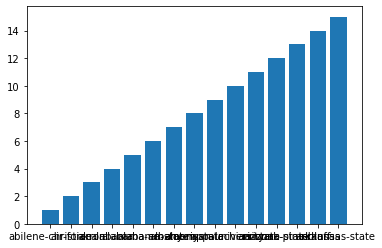

In [813]:
Rank = {A:N for (A,N) in [x for x in Ranks.items()][:15]}
keys=Rank.keys()
values=Rank.values()
plt.bar (keys,values,align ='center')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

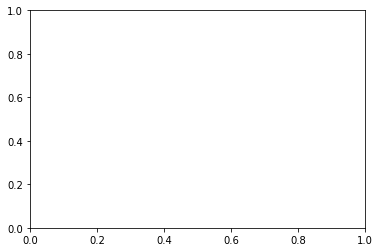

In [809]:
from pylab import *

Rank = {A:N for (A,N) in [x for x in Ranks.items()][:15]}
#keys=Rank.keys()
#values=Rank.values()
#plt.bar (keys,values,align ='center')

pos = arange(10)+.5

barh(pos, Rank.values(), align = 'center', color = 'green')
yticks(pos, (Rank.keys()))

for i, v in enumerate(Rank.values()):
    text(v + 3, i + .25, str(v), fontweight = 'bold', fontsize = '15')
xlim(0, 300)


grid(True)

show()
